
### Are there any homes in 2016 that never occupied? Is there any significant factors in why these places were never rented?

In [60]:
# Import libraries
import pandas as pd
import numpy as nm
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None  # default='warn'

# Load csv into dataframes
calender_df= pd.read_csv('..//data//calendar.csv')

# Initial data lookup
def get_shape(df):
    print('The shape of the dataframe is : '+ str(df.shape))
    
def get_head(df, rows = 5):
    print("########################################################################")
    print(df.head(rows))

In [61]:
# Get Shape
get_shape(calender_df);

The shape of the dataframe is : (1393570, 4)


In [62]:
# Get head
get_head(calender_df);

########################################################################
   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN


In [63]:
# Missing Values
def get_missing_values_by_column(df):
    all_cols = df.columns.values
    print(all_cols)
    for col in all_cols:
        missing_percent = df[col].isnull().mean()
        if missing_percent > 0:
            print("Column " + col + " has " + str(float("{0:.2f}".format(missing_percent * 100))) + "% missing values" )
            
get_missing_values_by_column(calender_df)

['listing_id' 'date' 'available' 'price']
Column price has 32.94% missing values


In [64]:
# Replace t and f in 'available' coulnm by 1 and 0 repsp to count 
calender_df['available'].replace(['t','f'],[1,0],inplace=True)

#Replace NaNs in price ccolumn by 0
calender_df.fillna(value=0,inplace=True)


In [65]:
print(calender_df.head())
series_cal = calender_df.groupby(['listing_id'])['available'].sum() == 365
cal = series_cal.reset_index()
never_occupied_estate = cal[cal['available']].listing_id.values

   listing_id        date  available   price
0      241032  2016-01-04          1  $85.00
1      241032  2016-01-05          1  $85.00
2      241032  2016-01-06          0       0
3      241032  2016-01-07          0       0
4      241032  2016-01-08          0       0


In [66]:
never_occupied_estate
len(never_occupied_estate)

678

In 2016, Seattle AirBNB 17.76% housing estates were never occupied thoughout the year


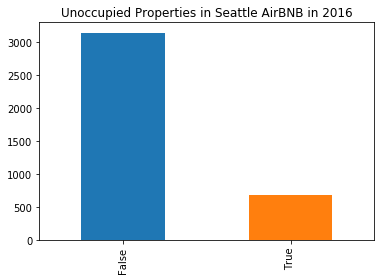

In [67]:
import matplotlib.pyplot as plt
print("In 2016, Seattle AirBNB "+str(float("{0:.2f}".format( cal['available'].mean() * 100))) + "% housing estates were never occupied thoughout the year")
cal['available'].value_counts().plot(kind='bar', title = 'Unoccupied Properties in Seattle AirBNB in 2016');


In [68]:
listing_df= pd.read_csv('..//data//listings.csv')
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [69]:
never_occupied_listing = listing_df[listing_df.id.isin(never_occupied_estate)]
occupied_listing = listing_df[~listing_df.id.isin(never_occupied_estate)]

In [70]:
print(never_occupied_listing.shape)
print(occupied_listing.shape)
print(listing_df.shape)

(678, 92)
(3140, 92)
(3818, 92)


In [74]:
#nlisting_df.host_since  ... convert to int diff between 01/01/2016 - host_since
#nlisting_df.transit....convert to nominal var 0 1, if Nan = 0, else 1
#(nlisting_df.experiences_offered == 'none').mean() .... drop this as all values are none
#nlisting_df.host_response_rate.value_counts() .... convert to 4 categories 5 = 95 to 100,90 to 94 = 4,81 to 90 = 3, 71 to 80 = 2, 70 to 51 = 1, 50 > 0
#nlisting_df.host_verifications.value_counts() ... drop this
#nlisting_df.market.value_counts() ... drop this
#nlisting_df.amenities.value_counts() ... conver this to number of amnities 
#nlisting_df.security_deposit.value_counts().. convert this to float
#nlisting_df.has_availability.value_counts()..drop this
#nlisting_df.requires_license.value_counts()...drp this
#nlisting_df.instant_bookable.value_counts()...0 1
#nlisting_df.require_guest_phone_verification.value_counts()


from datetime import datetime
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def get_float_val (df):
    df.replace(regex=True,inplace=True,to_replace='[^a-zA-Z0-9\n\.]',value='')
    df = df.astype(dtype='float')
    # since host left it blank..replacing null values with 0 
    return df.fillna(value = 0).copy()


def count_days_since(oldDate, currentDate = datetime(2016,1,1,0,0,0)):
    return (currentDate-oldDate).days


def preprocess_features(df):
    '''
    From looking at each of the categorical variable we found that,
    1. experiences_offered, host_verifications, market, has_availability, requires_license columns has only one value hence we need to Drop these columns from dataframe.
    2. 'security_deposit', 'cleaning_fee', 'extra_people' these columns need to be converted to float value of $
    3. amenities need to converted to int where number is total number of amenities
    4. host_response_rate need to converted to float
    5. Transit need to converted to nminal var where NaN = 0 and everuthing else is 1
    6. host_since need to converted to diff between 01/01/2016 - host_since in days

    '''
    #'security_deposit', 'cleaning_fee', 'extra_people',host_acceptance_rate
    df['host_acceptance_rate'] = get_float_val(df['host_acceptance_rate'])
    df['host_response_rate'] = get_float_val(df['host_response_rate'])
    df['security_deposit'] = get_float_val(df['security_deposit'])
    df['cleaning_fee'] = get_float_val(df['cleaning_fee'])
    df['extra_people'] = get_float_val(df['extra_people'])
    df['price'] = get_float_val(df['price'])  # there are no missing values here

    # transit
    df['Transit_available'] = ~ (df.transit.isnull())
    df = df.drop(['transit'],axis=1);

    # Amenities
    df['Facilities'] = df.amenities.apply(lambda a : len(a))
    df = df.drop(['amenities'],axis=1);

    # host since
    df['Host_experience'] = pd.to_datetime(df.host_since).apply(count_days_since)
    df = df.drop(['host_since'],axis=1);

    # Location_Label
    #kmeans = KMeans(n_clusters=5, random_state=0).fit(nlisting_df[['longitude','latitude']])
    #nlisting_df['Location_label'] = kmeans.labels_
    # Show Plot
    #plt.scatter(nlisting_df.longitude.values, nlisting_df.latitude.values, c=nlisting_df['Location_label'].values, alpha=0.5)
    #plt.show()

    #nlisting_df = nlisting_df.drop(['longitude'],axis=1)
    #nlisting_df = nlisting_df.drop(['latitude'],axis=1)

    #experiences_offered, host_verifications, market, has_availability, requires_license
    df = df.drop(['experiences_offered','host_verifications','market','has_availability','requires_license'],axis=1)

    return df


#lets impute data
def impute_features(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    df - pandas dataframe with imputed data
    
    This function cleans df using the following steps to produce X and y:
    1. For each numeric variable in X, fill the column with the mean value of the column.
    2. Lets drop all the rows which has nan values in the 
    '''
   
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    print(num_vars)
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    print(cat_vars)
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        #df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
        df = df.dropna(subset = [var],axis = 0)
    return df

#lets clean the data
def split_data(df,target='price'):
    '''
    INPUT
    df - pandas dataframe 
    target - target var 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no target
    2. Create X as all the columns that are not the target column
    3. Create y as the target column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=[target], axis=0)
    y = df[target]
    
    #Drop respondent and expected salary columns
    df = df.drop([target], axis=1)
    
    X = df
    return X, y


def normalise_data(df):   
    # normalise data
    scaler = MinMaxScaler().fit(df)
    return scaler.transform(df)




In [75]:
def data_wrangling(df):

    # Select relavent features for analysis
    selected_vars = ['id', 'experiences_offered',
           'transit', 'host_since', 'host_response_rate',
           'host_acceptance_rate', 'host_is_superhost',
           'host_total_listings_count', 'host_verifications',
           'host_has_profile_pic', 'host_identity_verified', 'market', 
           'zipcode', 'is_location_exact', 'property_type', 'room_type',
           'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
           'amenities', 'square_feet', 'price', 'security_deposit', 'cleaning_fee',
           'guests_included', 'extra_people', 'minimum_nights',
           'maximum_nights', 'has_availability',
           'number_of_reviews',
           'review_scores_rating',
           'review_scores_accuracy', 'review_scores_cleanliness',
           'review_scores_checkin', 'review_scores_communication',
           'review_scores_location', 'review_scores_value',
           'requires_license', 
           'instant_bookable', 'cancellation_policy',
           'require_guest_profile_picture',
           'require_guest_phone_verification',
           'reviews_per_month']

    # remove irrelavant features from dataframe
    df = df[selected_vars]
    print(df.shape)

    # Preprocess the features as per required for analysis
    df = preprocess_features(df)
    print(df.shape)

    # Null Values
    df.columns[df.isnull().mean() > 0]

    #Use the function to create X and y
    df = wrangle_features(df) 
    print(df.shape)

    #Normalise Data
    #df = normalise_data(df)
    #print(df.shape)
    
    return df

In [76]:
occupied_listing = data_wrangling(occupied_listing)
print(occupied_listing.shape)

never_occupied_listing = data_wrangling(never_occupied_listing)
print(occupied_listing.shape)

(3140, 45)
(3140, 40)
Index(['id', 'host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month', 'Facilities',
       'Host_experience'],
      dtype='object')
Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'zipcode', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')
(3132, 40)
(3132, 40)
(678, 45)
(678, 40)
Index(['id', 'host_res

In [78]:
occupied_listing.describe()

,id,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Facilities,Host_experience
count,3.132000e+03,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,...,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,5.592000e+06,83.579183,82.024266,7.063857,3.435185,1.267766,1.331522,1.767561,826.897436,128.456897,...,94.883752,9.666570,9.591047,9.808288,9.829041,9.629863,9.491207,2.223690,204.741699,829.650064
std,2.931461e+06,33.431193,38.404652,28.888442,2.014784,0.593471,0.919502,1.176636,97.580525,90.980572,...,5.787527,0.615634,0.706188,0.511951,0.492799,0.560599,0.666845,1.742871,69.352404,561.954344
min,5.682000e+03,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000,2.000000,-2.000000
25%,3.342246e+06,90.000000,100.000000,1.000000,2.000000,1.000000,1.000000,1.000000,826.897436,75.000000,...,94.000000,9.666038,9.000000,9.808214,9.829259,9.000000,9.000000,0.890000,159.000000,354.750000
50%,6.183022e+06,100.000000,100.000000,1.000000,3.000000,1.000000,1.000000,1.000000,826.897436,100.000000,...,95.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.490580,2.140000,202.000000,747.500000
75%,8.014793e+06,100.000000,100.000000,3.000000,4.000000,1.000000,2.000000,2.000000,826.897436,150.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.912500,249.000000,1199.000000
max,1.034016e+07,100.000000,100.000000,502.000000,16.000000,8.000000,7.000000,15.000000,2750.000000,1000.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000,446.000000,2608.000000


In [80]:
never_occupied_listing.describe()

,id,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Facilities,Host_experience
count,6.760000e+02,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,5.367113e+06,74.403846,69.526627,7.642012,2.945266,1.218573,1.197328,1.588146,969.409841,125.278107,...,92.743345,9.481207,9.378339,9.677386,9.707304,9.503454,9.249755,1.322139,178.347633,852.001479
std,3.084483e+06,37.576446,46.063539,27.577053,1.713119,0.565803,0.667505,0.936111,137.213567,86.588715,...,6.820357,0.705609,0.795134,0.648567,0.614289,0.616433,0.728901,1.023598,73.309727,602.500780
min,4.291000e+03,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,30.000000,...,60.000000,4.000000,4.000000,4.000000,4.000000,6.000000,6.000000,0.030000,2.000000,-2.000000
25%,2.909030e+06,66.250000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,968.421053,70.000000,...,92.000000,9.000000,9.000000,9.673913,9.706693,9.000000,9.000000,0.640000,131.000000,332.000000
50%,5.679384e+06,96.500000,100.000000,1.000000,2.000000,1.000000,1.000000,1.000000,968.421053,100.000000,...,92.748527,9.481262,9.378698,10.000000,10.000000,9.501969,9.251969,1.323740,177.000000,747.000000
75%,8.090495e+06,100.000000,100.000000,3.000000,4.000000,1.000000,1.000000,2.000000,968.421053,150.000000,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.470000,222.000000,1313.250000
max,1.033914e+07,100.000000,100.000000,354.000000,15.000000,5.000000,5.000000,7.000000,3000.000000,950.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.240000,457.000000,2608.000000


In [89]:
def compare_cat_columns(df1,df2,var):
    count_vals = df1[var].value_counts() / df1[var].count()
    plt.figure(figsize=(20,20))
    plt.subplot(2, 1, 1)
    (count_vals).plot(kind="barh");
    plt.title("Occupied")
    
    count_vals = df2[var].value_counts() / df2[var].count()
    plt.subplot(2, 1, 2)
    (count_vals).plot(kind="barh");
    plt.title("Not-Occupied");
    return

In [83]:
never_occupied_listing[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'zipcode', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification']].describe()

,host_is_superhost,host_has_profile_pic,host_identity_verified,zipcode,is_location_exact,property_type,room_type,bed_type,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,676,676,676,676,676,676,676,676,676,676,676,676
unique,2,2,2,26,2,13,3,5,2,3,2,2
top,f,t,t,98122,t,House,Entire home/apt,Real Bed,f,flexible,f,f
freq,590,673,506,75,582,339,332,634,617,260,627,617


In [86]:
occupied_listing[['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'zipcode', 'is_location_exact', 'property_type', 'room_type',
       'bed_type', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification']].describe()

,host_is_superhost,host_has_profile_pic,host_identity_verified,zipcode,is_location_exact,property_type,room_type,bed_type,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132,3132
unique,2,2,2,27,2,16,3,5,2,3,2,2
top,f,t,t,98122,t,Apartment,Entire home/apt,Real Bed,f,strict,f,f
freq,2441,3128,2484,345,2823,1448,2202,3013,2602,1188,2861,2817


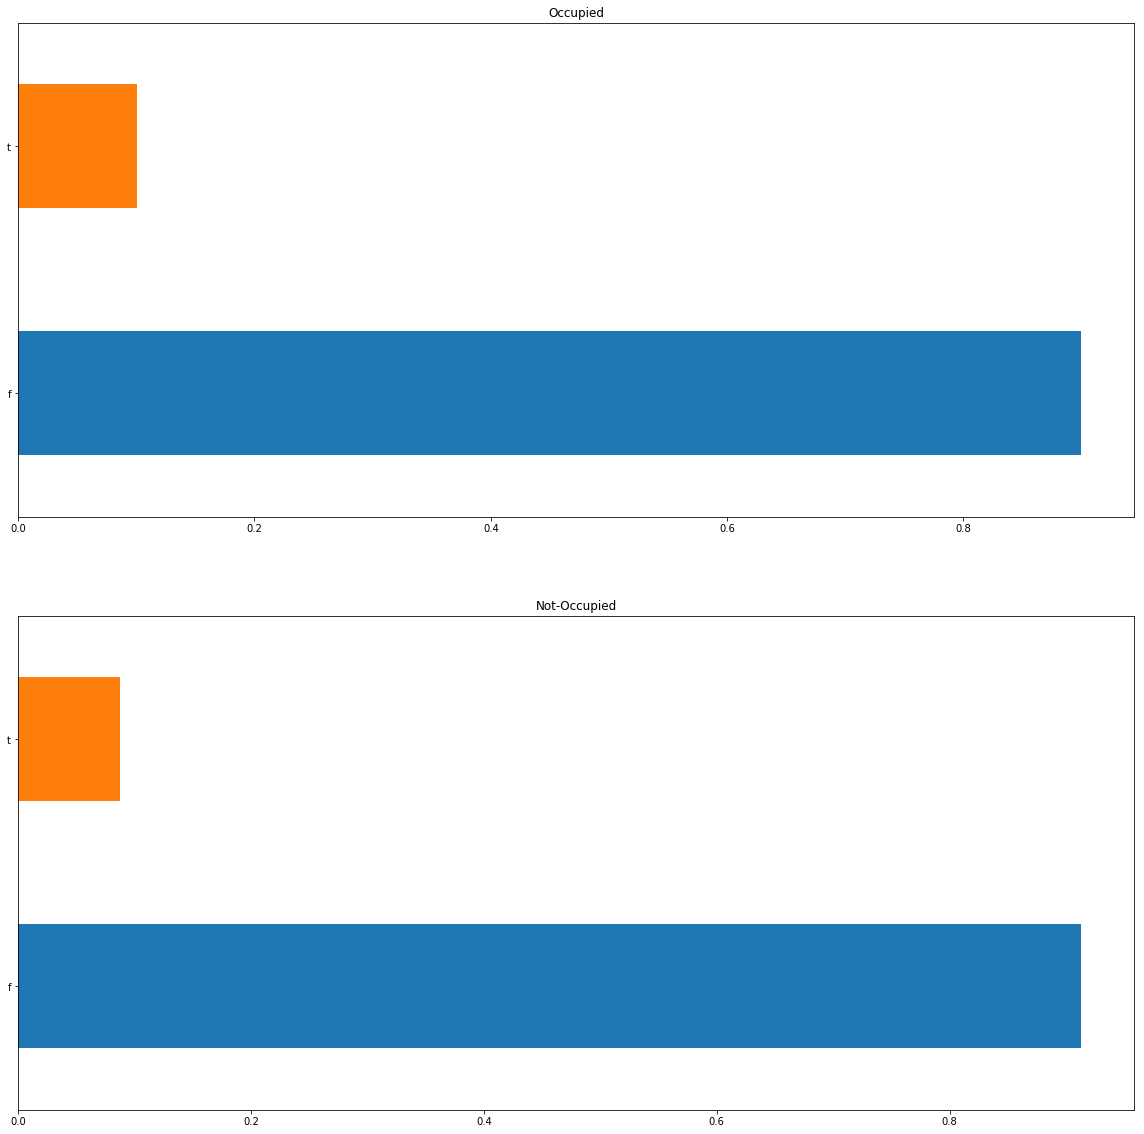

In [97]:
compare_cat_columns(occupied_listing,never_occupied_listing,'require_guest_phone_verification')